In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [0]:
t_train = pd.read_csv(r"C:\Users\YASHA\titanic\train.csv")
t_test  = pd.read_csv(r"C:\Users\YASHA\titanic\test.csv")

In [0]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
t_train.shape

(891, 12)

In [0]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
t_test.shape

(418, 11)

In [0]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


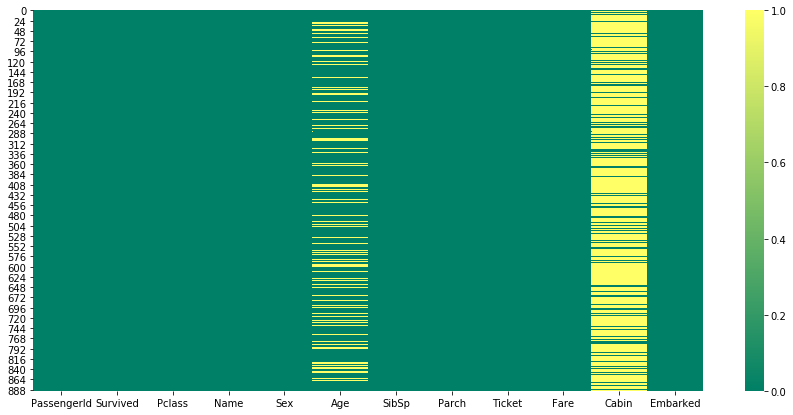

In [0]:
fig =plt.figure(figsize=(15,7))
sns.heatmap(t_train.isnull(), cmap = 'summer')

In [0]:
null_columns=t_train.columns[t_train.isnull().any()]
print(t_train[t_train["Embarked"].isnull()][null_columns])

      Age Cabin Embarked
61   38.0   B28      NaN
829  62.0   B28      NaN


In [0]:
print(t_train[['Name','Embarked']].iloc[61:62,:])

                   Name Embarked
61  Icard, Miss. Amelie      NaN


In [0]:
print(t_train[['Name','Embarked']].iloc[829:830,:])

                                          Name Embarked
829  Stone, Mrs. George Nelson (Martha Evelyn)      NaN


In [0]:
t_train.iloc[61:62]['Embarked'] = 'C'
t_train.iloc[829:830]['Embarked']  = 'S'

In [0]:
t_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace = True)
t_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [0]:
t_train['Age'].value_counts()
t_train['Age'].max()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

80.0

In [0]:
t_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
null_columns=t_train.columns[t_train.isnull().any()]
print(t_train[t_train["Age"].isnull()][null_columns])

     Age
5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
29   NaN
31   NaN
32   NaN
36   NaN
42   NaN
45   NaN
46   NaN
47   NaN
48   NaN
55   NaN
64   NaN
65   NaN
76   NaN
77   NaN
82   NaN
87   NaN
95   NaN
101  NaN
107  NaN
109  NaN
121  NaN
126  NaN
128  NaN
140  NaN
154  NaN
..   ...
718  NaN
727  NaN
732  NaN
738  NaN
739  NaN
740  NaN
760  NaN
766  NaN
768  NaN
773  NaN
776  NaN
778  NaN
783  NaN
790  NaN
792  NaN
793  NaN
815  NaN
825  NaN
826  NaN
828  NaN
832  NaN
837  NaN
839  NaN
846  NaN
849  NaN
859  NaN
863  NaN
868  NaN
878  NaN
888  NaN

[177 rows x 1 columns]


C:\Users\YASHA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\YASHA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\YASHA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\YASHA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


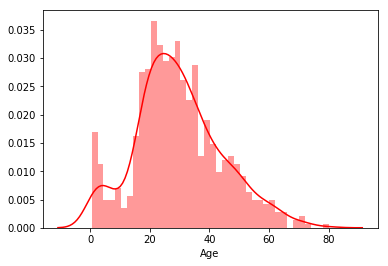

In [0]:
sns.distplot(t_train['Age'], bins = 40, color = 'Red')

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

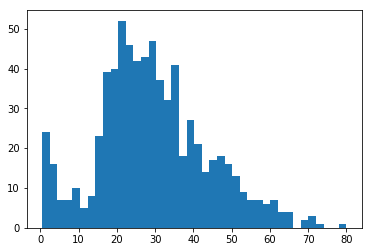

In [0]:
plt.hist(t_train['Age'], bins=40)

(array([32., 22.,  8.,  8., 13.,  5.,  8., 26., 51., 45., 61., 60., 50.,
        49., 59., 46., 42., 56., 24., 35., 26., 23., 22., 21., 23., 14.,
        12.,  9.,  7.,  6.,  8.,  5.,  6.,  0.,  2.,  4.,  1.,  0.,  0.,
         2.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

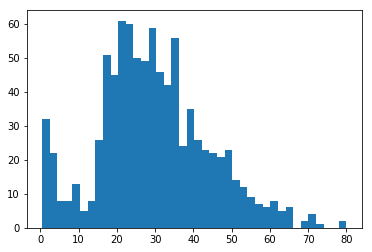

In [0]:
t_train.fillna(method ='bfill',inplace = True)
t_test.fillna(method = 'bfill', inplace = True)
plt.hist(t_train['Age'], bins=40)
#sns.distplot(t_train['Age'], bins = 40, color = 'Red')


In [0]:
t_train['Age'].describe()

count    891.000000
mean      29.870561
std       14.597668
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
t_train['Age'].sum()

26614.67

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
t_train['Sex'] = labelencoder.fit_transform(t_train['Sex'])
t_train['Embarked'] = labelencoder.fit_transform(t_train['Embarked'])
t_test['Sex'] = labelencoder.fit_transform(t_test['Sex'])
t_test['Embarked'] = labelencoder.fit_transform(t_test['Embarked'])

In [0]:
t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
t_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,8,1
1,3,0,47.0,1,0,7,2
2,2,1,62.0,0,0,10,1
3,3,1,27.0,0,0,9,2
4,3,0,22.0,1,1,12,2


In [0]:
Y_train = t_train['Survived']
X_train = t_train.drop('Survived', axis = 1)

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_train)
prediction = [round(value) for value in y_pred]

In [0]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(Y_train, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.77%


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap = True,
                             max_features = 'auto', 
                             n_estimators = 10,
                             criterion = 'gini')
clf.fit(X_train,Y_train)
y_preds = clf.predict(X_train)
predictions = [round(value) for value in y_preds]
accuracy_1 = accuracy_score(Y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy_1 * 100.0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy: 97.31%


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap = False,
                             max_features = 'auto', 
                             n_estimators = 10,
                             criterion = 'gini')
clf.fit(X_train,Y_train)
y_preds = clf.predict(X_train)
predictions = [round(value) for value in y_preds]
accuracy_1 = accuracy_score(Y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy_1 * 100.0))

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy: 98.54%


In [0]:
from sklearn.ensemble import AdaBoostClassifier
clfs = AdaBoostClassifier(algorithm = 'SAMME',learning_rate = 1.5 , n_estimators = 100 )
clfs.fit(X_train,Y_train)
y_predss = clfs.predict(X_train)
predictionss = [round(value) for value in y_predss]
accuracys = accuracy_score(Y_train, predictionss)
print("Accuracy: %.2f%%" % (accuracys * 100.0))

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
          n_estimators=100, random_state=None)

Accuracy: 82.49%


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clff = GradientBoostingClassifier()
clff.fit(X_train,Y_train)
y_predsss = clff.predict(X_train)
predictionsss = [round(value) for value in y_predsss]
accuracysss = accuracy_score(Y_train, predictionsss)
print("Accuracy: %.2f%%" % (accuracysss * 100.0))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Accuracy: 88.22%


In [0]:
from sklearn.naive_bayes import GaussianNB
clas = GaussianNB()
clas.fit(X_train,Y_train)
y_predssss = clas.predict(X_train)
predictionssss = [round(value) for value in y_predssss]
accuracyssss = accuracy_score(Y_train, predictionssss)
print("Accuracy: %.2f%%" % (accuracyssss * 100.0))


GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy: 79.12%


In [0]:
from sklearn.linear_model import LogisticRegression
cla = LogisticRegression()
cla.fit(X_train,Y_train)
y_predsssss = cla.predict(X_train)
predictionsssss = [round(value) for value in y_predsssss]
accuracysssss = accuracy_score(Y_train, predictionsssss)
print("Accuracy: %.2f%%" % (accuracysssss * 100.0))

C:\Users\YASHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy: 79.91%


In [0]:
y_preGBC = print(y_predsss)
GBC = pd.DataFrame(y_predsss, columns=['predictions_1GBC'])

[0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 

In [0]:
print(GBC)

     predictions_1GBC
0                   0
1                   1
2                   0
3                   1
4                   0
5                   0
6                   0
7                   0
8                   1
9                   1
10                  1
11                  1
12                  0
13                  0
14                  1
15                  1
16                  0
17                  0
18                  0
19                  1
20                  0
21                  0
22                  1
23                  0
24                  0
25                  1
26                  0
27                  0
28                  1
29                  0
..                ...
861                 0
862                 1
863                 0
864                 0
865                 1
866                 1
867                 0
868                 0
869                 1
870                 0
871                 1
872                 0
873                 0
874       

In [0]:
XGBC = pd.DataFrame(y_pred, columns=['predictions_0XGBC'])
ABC = pd.DataFrame(y_predss, columns=['predictions_2ABC'])
RFC = pd.DataFrame(y_preds, columns=['predictions_3RFC'])
LR = pd.DataFrame(y_predsssss, columns=['predictions_5LR'])
GNB = pd.DataFrame(y_predssss, columns=['predictions_4GNB'])

In [0]:
Survival = pd.DataFrame(Y_train, columns=['Surviveded'])

In [0]:
type(Survival)

pandas.core.frame.DataFrame

In [0]:
result = pd.concat([XGBC, GBC, ABC, RFC, GNB, LR, Y_train], axis=1)

In [0]:
print(result.head())

   predictions_0XGBC  predictions_1GBC  predictions_2ABC  predictions_3RFC  \
0                  0                 0                 0                 0   
1                  1                 1                 1                 1   
2                  1                 0                 1                 1   
3                  1                 1                 1                 1   
4                  0                 0                 0                 0   

   predictions_4GNB  predictions_5LR  Survived  
0                 0                0         0  
1                 1                1         1  
2                 1                1         1  
3                 1                1         1  
4                 0                0         0  


In [0]:
result.to_csv(r"C:\Users\YASHA\titanic\result_01csv")

In [0]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
Embarked    418 non-null int32
dtypes: float64(1), int32(2), int64(4)
memory usage: 19.7 KB


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.8 KB


In [0]:
t_test['Fare'] = [round(value) for value in t_test['Fare']]
t_test[['Age','Fare']]

,Age,Fare
0,34.5,8
1,47.0,7
2,62.0,10
3,27.0,9
4,22.0,12
5,14.0,9
6,30.0,8
7,26.0,29
8,18.0,7
9,21.0,24


In [0]:
t_test.iloc[416:418]['Age'] = 38.5
t_test['Age'].iloc[401:421]

C:\Users\YASHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408     3.0
409     3.0
410    37.0
411    37.0
412    28.0
413    39.0
414    39.0
415    38.5
416    38.5
417    38.5
Name: Age, dtype: float64

In [0]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train,Y_train)
test_pred = RFC_model.predict(t_test)

C:\Users\YASHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
test_pred = model.predict(t_test)

In [0]:
test_pred = pd.DataFrame(test_pred, columns = ['Survived'])
t_test_id = pd.read_csv(r"C:\Users\YASHA\titanic\test.csv")
PassengerId = t_test_id['PassengerId']
PassengerId = pd.DataFrame(PassengerId, columns = ['PassengerId'])
gender_submission = pd.concat([PassengerId, test_pred], axis = 1)
gender_submission.set_index(['PassengerId', 'Survived'], inplace = True)
gender_submission.to_csv(r"C:\Users\YASHA\titanic\gender_submission.csv")